# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('../data/raw/complaints.csv')
df.head()

C:\Users\arsem\AppData\Local\Temp\ipykernel_28492\2658561776.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/raw/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
import re
print("Unique Product Categories:")
print(df['Product'].dropna().unique())

Unique Product Categories:
['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


✅ Project Requirement: Keep only complaints for:
Credit card

Personal loan

Buy Now, Pay Later (BNPL)

Savings account

Money transfers

In [7]:
def map_product(product):
    product=str(product).lower()
    if "credit card" in product:
        return "Credit card"
    elif "personal loan" in product or "consumer loan" in product:
        return "Personal Loan"
    elif "buy now, pay later" in product:
        return "Buy now, pay later (BNPL)"
    elif "savings account" in product or "checking" in product or "bank account" in product:
        return "Savings account"
    elif "money transfer" in product:
        return "Money transfers"
    else:
        return None 

df['Mapped Product'] = df['Product'].apply(map_product)

df_filtered = df[
    df['Mapped Product'].notnull() & 
    df['Consumer complaint narrative'].notnull()
].copy()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\bi am writing.*?complaint\b", "", text)
    return text.strip()

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

df_filtered.to_csv('../data/processed/filtered_complaints.csv', index=False)
print(f"✅ Saved cleaned dataset with {len(df_filtered)} rows.")
print("✅ Unique products retained:", df_filtered['Mapped Product'].unique())

✅ Saved cleaned dataset with 478818 rows.
✅ Unique products retained: ['Credit card' 'Savings account' 'Personal Loan' 'Money transfers']


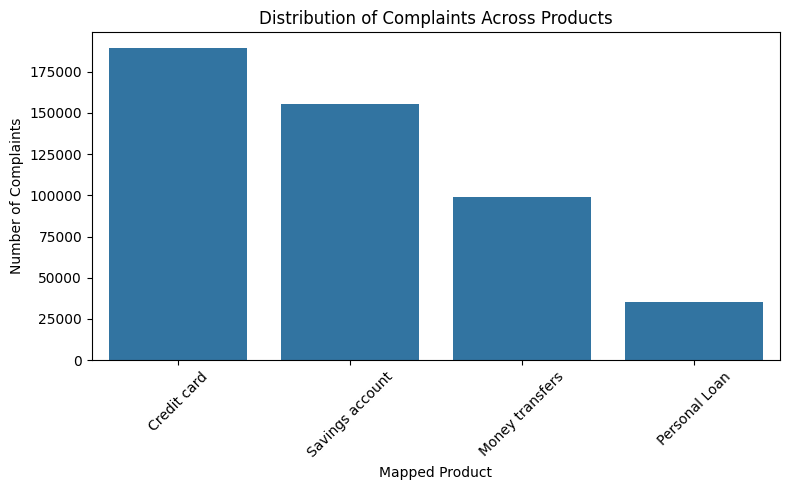

In [8]:

# Count complaints per mapped product
product_counts = df_filtered['Mapped Product'].value_counts()

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Distribution of Complaints Across Products')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


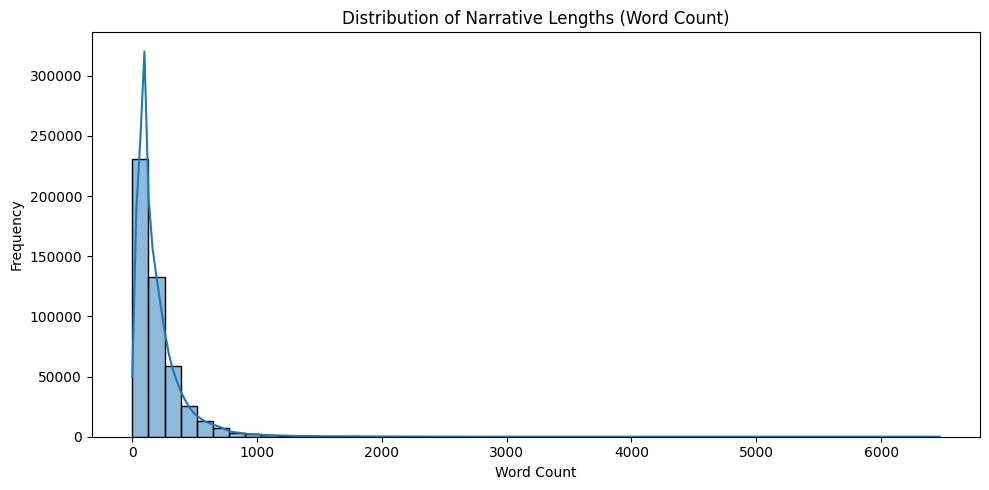

Shortest narrative: 0 words
Longest narrative: 6469 words
Median narrative length: 136.0 words


In [9]:
# Add word count column
df_filtered['word_count'] = df_filtered['cleaned_narrative'].apply(lambda x: len(x.split()))

# Histogram of word counts
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['word_count'], bins=50, kde=True)
plt.title('Distribution of Narrative Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# (Optional) print stats
print("Shortest narrative:", df_filtered['word_count'].min(), "words")
print("Longest narrative:", df_filtered['word_count'].max(), "words")
print("Median narrative length:", df_filtered['word_count'].median(), "words")


In [10]:
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()
print(f"Complaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")


Complaints with narrative: 2980756
Complaints without narrative: 6629041
